In [1]:
from __future__ import print_function, division
import torch
from PIL import Image
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
from torchvision import datasets, models
import matplotlib.pyplot as plt
import torch.nn.functional as F
import time
import os
import copy
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from Attributions import *

In [2]:
path = "./data/integrated_grad_ex/"
example_imgs = []
tenseUp = transforms.ToTensor()
means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]
norm = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
for i in range(1, 7):
    example_imgs.append(Image.open(path + "0" + str(i) + ".jpg"))
    example_imgs[-1] = norm(tenseUp(example_imgs[-1]))

In [3]:
model = models.googlenet(pretrained=True).cuda()

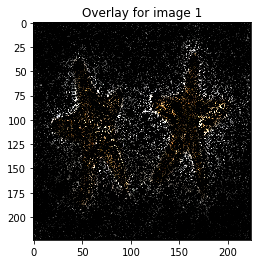

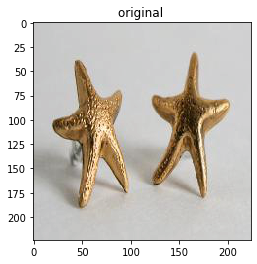

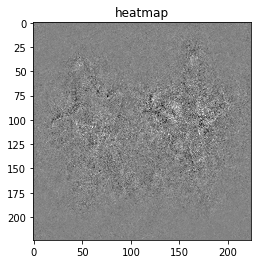

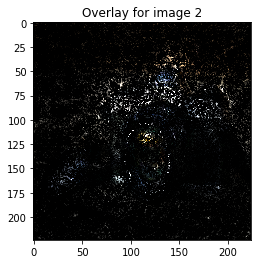

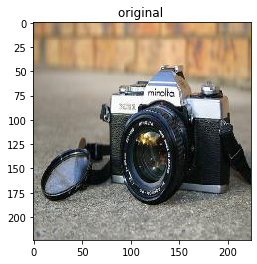

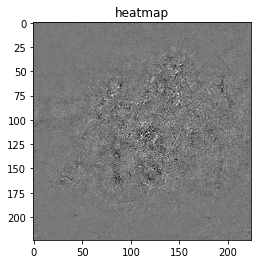

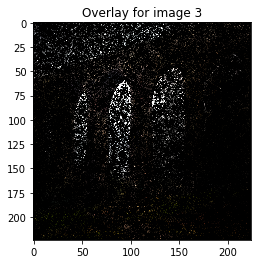

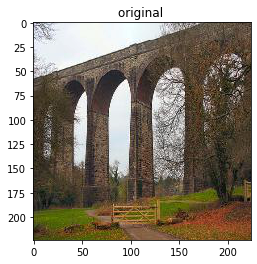

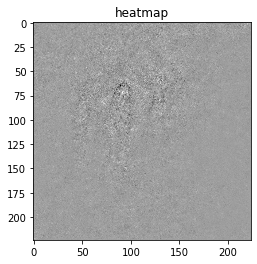

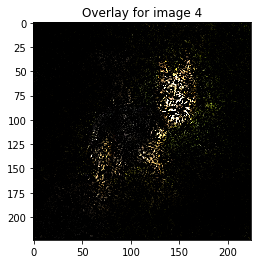

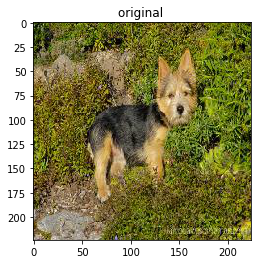

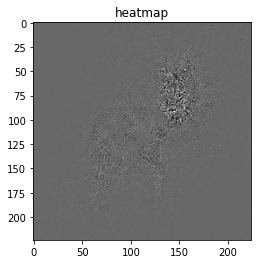

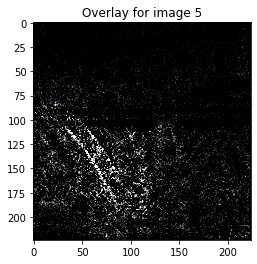

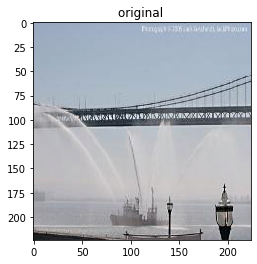

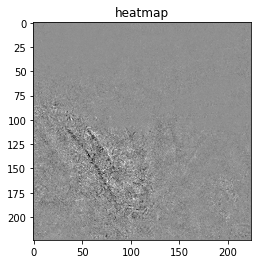

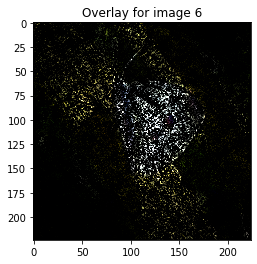

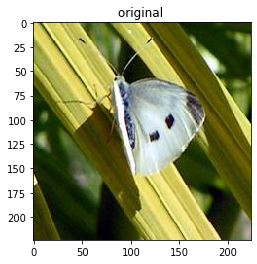

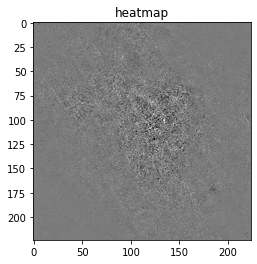

In [4]:
black_base = black_like(example_imgs[0].cuda(), torch.tensor(means).cuda(), torch.tensor(stds).cuda())
for i in range(6):
    atts = random_baseline_attribution(model, example_imgs[i], 10, means, stds, lambda x: F.softmax(x, dim = 1))
    att_sum = atts.sum(axis = 1)[0]
    simple_scale(att_sum, 1, 70)
    att_imshow(example_imgs[i].cpu(), att_sum.cpu(), "Overlay for image " + str(i + 1))
    imshow(example_imgs[i].cpu(), "original ")
    heatmap_imshow(att_sum.cpu(), "heatmap")